In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('/content/drive/MyDrive/DataA_dev/Airbnb_new_user_booking/sessions.csv')




In [2]:
print("Basic Information:")
print(data.info())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        object 
 1   action         object 
 2   action_type    object 
 3   action_detail  object 
 4   device_type    object 
 5   secs_elapsed   float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB
None


In [3]:
print("\nFirst Few Rows:")
print(data.head())


First Few Rows:
      user_id          action action_type        action_detail  \
0  d1mm9tcy42          lookup         NaN                  NaN   
1  d1mm9tcy42  search_results       click  view_search_results   
2  d1mm9tcy42          lookup         NaN                  NaN   
3  d1mm9tcy42  search_results       click  view_search_results   
4  d1mm9tcy42          lookup         NaN                  NaN   

       device_type  secs_elapsed  
0  Windows Desktop         319.0  
1  Windows Desktop       67753.0  
2  Windows Desktop         301.0  
3  Windows Desktop       22141.0  
4  Windows Desktop         435.0  


In [4]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64


In [5]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       secs_elapsed
count  1.043171e+07
mean   1.940581e+04
std    8.888424e+04
min    0.000000e+00
25%    2.290000e+02
50%    1.147000e+03
75%    8.444000e+03
max    1.799977e+06


In [ ]:
import pandas as pd


file_path = '/content/drive/MyDrive/DataA_dev/Airbnb_new_user_booking/train_users_2.csv'
df_train = pd.read_csv(file_path)


df_train.head(), df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

(           id date_account_created  timestamp_first_active date_first_booking  \
 0  gxn3p5htnn           2010-06-28          20090319043255                NaN   
 1  820tgsjxq7           2011-05-25          20090523174809                NaN   
 2  4ft3gnwmtx           2010-09-28          20090609231247         2010-08-02   
 3  bjjt8pjhuk           2011-12-05          20091031060129         2012-09-08   
 4  87mebub9p4           2010-09-14          20091208061105         2010-02-18   
 
       gender   age signup_method  signup_flow language affiliate_channel  \
 0  -unknown-   NaN      facebook            0       en            direct   
 1       MALE  38.0      facebook            0       en               seo   
 2     FEMALE  56.0         basic            3       en            direct   
 3     FEMALE  42.0      facebook            0       en            direct   
 4  -unknown-  41.0         basic            0       en            direct   
 
   affiliate_provider first_affiliate_trac

In [ ]:
sessions_path = '/content/drive/MyDrive/DataA_dev/Airbnb_new_user_booking/sessions.csv'
sessions_df = pd.read_csv(sessions_path)
sessions_df.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


세션에따른 예약률


In [ ]:
import pandas as pd

# Define file paths
sessions_path = '/content/drive/MyDrive/DataA_dev/Airbnb_new_user_booking/sessions.csv'
train_users_2_path = '/content/drive/MyDrive/DataA_dev/Airbnb_new_user_booking/train_users_2.csv'

# Load datasets into pandas dataframes
sessions_df = pd.read_csv(sessions_path)
train_users_2_df = pd.read_csv(train_users_2_path)

# 결측값 처리
train_users_2_df.fillna({'age': train_users_2_df['age'].median()}, inplace=True)
train_users_2_df.fillna('unknown', inplace=True)

# 데이터 타입 변환
train_users_2_df['date_account_created'] = pd.to_datetime(train_users_2_df['date_account_created'])
train_users_2_df['timestamp_first_active'] = pd.to_datetime(train_users_2_df['timestamp_first_active'], format='%Y%m%d%H%M%S')

# 필요 없는 열 제거
train_users_2_df = train_users_2_df.drop(['date_first_booking'], axis=1)

# session data를 사용자 별로 집계
sessions_agg = sessions_df.groupby('user_id').agg({
    'action': 'count',
    'secs_elapsed': 'sum'
}).reset_index().rename(columns={'action': 'session_count', 'secs_elapsed': 'total_secs_elapsed'})

# train_users_2 데이터와 병합
train_users_2_df = train_users_2_df.rename(columns={'id': 'user_id'})
train_users_merged = pd.merge(train_users_2_df, sessions_agg, how='left', on='user_id')

# 결측값 처리 (세션 데이터가 없는 경우 0으로 대체)
train_users_merged['session_count'].fillna(0, inplace=True)
train_users_merged['total_secs_elapsed'].fillna(0, inplace=True)

# 사용자 활동성에 따른 예약률 분석
train_users_merged['booked'] = train_users_merged['country_destination'] != 'NDF'

# 세션 수에 따른 예약률 수치 계산
session_booking_rate = train_users_merged.groupby('session_count')['booked'].mean().reset_index()
session_booking_rate.columns = ['session_count', 'booking_rate']

# 총 세션 시간에 따른 예약률 수치 계산
session_time_booking_rate = train_users_merged.groupby('total_secs_elapsed')['booked'].mean().reset_index()
session_time_booking_rate.columns = ['total_secs_elapsed', 'booking_rate']

# 데이터프레임 출력
print("Session Booking Rate:")
print(session_booking_rate.head(10))  # 상위 10개 행만 출력

print("\nTotal Session Time Booking Rate:")
print(session_time_booking_rate.head(10))  # 상위 10개 행만 출력

# 결과 해석
summary_session_count = session_booking_rate.describe()
summary_total_secs_elapsed = session_time_booking_rate.describe()

print("\nSummary Statistics for Session Count Booking Rate:")
print(summary_session_count)

print("\nSummary Statistics for Total Session Time Booking Rate:")
print(summary_total_secs_elapsed)


Session Booking Rate:
   session_count  booking_rate
0            0.0      0.430540
1            1.0      0.331530
2            2.0      0.269918
3            3.0      0.283668
4            4.0      0.293661
5            5.0      0.280627
6            6.0      0.295658
7            7.0      0.291367
8            8.0      0.317145
9            9.0      0.291634

Total Session Time Booking Rate:
   total_secs_elapsed  booking_rate
0                 0.0      0.429698
1                 1.0      0.000000
2                 2.0      0.000000
3                 3.0      0.000000
4                 9.0      0.000000
5                41.0      0.000000
6                46.0      0.000000
7                72.0      0.000000
8                86.0      1.000000
9                89.0      0.000000

Summary Statistics for Session Count Booking Rate:
       session_count  booking_rate
count     929.000000    929.000000
mean      522.798708      0.491940
std       386.811445      0.300846
min         0.0

사용자의 다양한 액션이 예약에 미치는 영향을 분석하고, 예약률을 높이기 위한 인사이트를 도출


#가설 1 : 세션 수가 많을수록 예약률이 낮아진다.
이유 :

사용자 행동 패턴:  

사용자들이 플랫폼에서 여러 번 세션을 갖는다는 것은 여러 번 탐색하고 검색하지만 예약을 완료하지 못하고 있다는 것을 의미. 이는 플랫폼 내에서 필요한 정보를 찾지 못하거나, 예약 결정을 미루고 있다는 신호

결정 지연 현상:

사용자가 많은 세션을 통해 여러 번 탐색하는 경우, 결정을 내리는 데 더 오랜 시간이 걸릴 수 있음 이는 결국 예약을 완료하지 못하는 경우로 이어질 수 있음

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define file paths
sessions_path = '/content/drive/MyDrive/DataA_dev/Airbnb_new_user_booking/sessions.csv'
train_users_2_path = '/content/drive/MyDrive/DataA_dev/Airbnb_new_user_booking/train_users_2.csv'

# Load datasets into pandas dataframes
sessions_df = pd.read_csv(sessions_path)
train_users_2_df = pd.read_csv(train_users_2_path)

# 결측값 처리
train_users_2_df.fillna({'age': train_users_2_df['age'].median()}, inplace=True)
train_users_2_df.fillna('unknown', inplace=True)

# 데이터 타입 변환
train_users_2_df['date_account_created'] = pd.to_datetime(train_users_2_df['date_account_created'])
train_users_2_df['timestamp_first_active'] = pd.to_datetime(train_users_2_df['timestamp_first_active'], format='%Y%m%d%H%M%S')

# 필요 없는 열 제거
train_users_2_df = train_users_2_df.drop(['date_first_booking'], axis=1)

# session data를 사용자별로 집계
sessions_agg = sessions_df.groupby('user_id').agg({
    'action': 'count',
    'secs_elapsed': 'sum'
}).reset_index().rename(columns={'action': 'session_count', 'secs_elapsed': 'total_secs_elapsed'})

# 사용자 데이터와 세션 데이터 병합
train_users_2_df = train_users_2_df.rename(columns={'id': 'user_id'})
train_users_merged = pd.merge(train_users_2_df, sessions_agg, how='left', on='user_id')
train_users_merged['session_count'].fillna(0, inplace=True)
train_users_merged['total_secs_elapsed'].fillna(0, inplace=True)

# 예약 여부 추가
train_users_merged['booked'] = train_users_merged['country_destination'] != 'NDF'


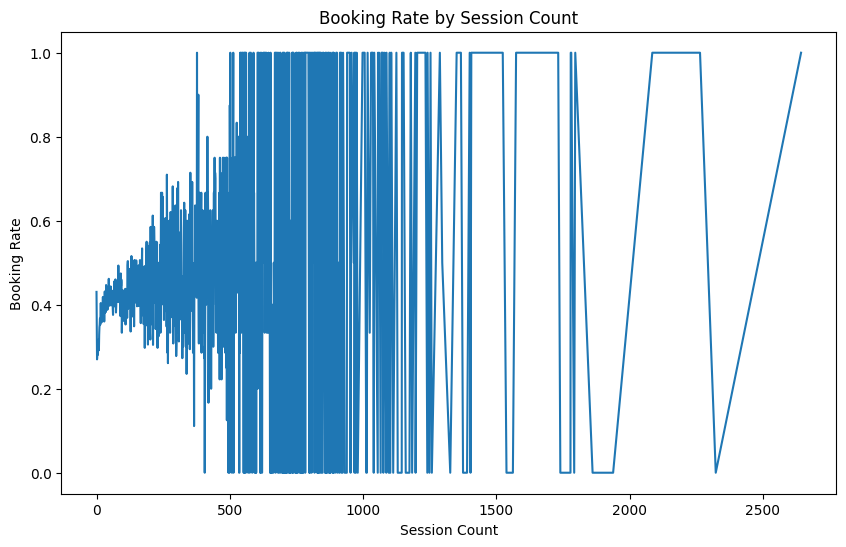

       session_count  booking_rate
count     929.000000    929.000000
mean      522.798708      0.491940
std       386.811445      0.300846
min         0.000000      0.000000
25%       232.000000      0.333333
50%       464.000000      0.453125
75%       721.000000      0.666667
max      2643.000000      1.000000
    session_count  booking_rate
0             0.0      0.430540
1             1.0      0.331530
2             2.0      0.269918
3             3.0      0.283668
4             4.0      0.293661
5             5.0      0.280627
6             6.0      0.295658
7             7.0      0.291367
8             8.0      0.317145
9             9.0      0.291634
10           10.0      0.329071
11           11.0      0.346378
12           12.0      0.352992
13           13.0      0.367012
14           14.0      0.352283
15           15.0      0.374280
16           16.0      0.403946
17           17.0      0.376059
18           18.0      0.397408
19           19.0      0.357968


In [ ]:
# 세션 수에 따른 예약률 계산
session_booking_rate = train_users_merged.groupby('session_count')['booked'].mean().reset_index()
session_booking_rate.columns = ['session_count', 'booking_rate']

# 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(data=session_booking_rate, x='session_count', y='booking_rate')
plt.title('Booking Rate by Session Count')
plt.xlabel('Session Count')
plt.ylabel('Booking Rate')
plt.show()

# 세션 수에 따른 예약률 통계
print(session_booking_rate.describe())
print(session_booking_rate.head(20))  # 상위 20개 세션 수에 대한 예약률


##한 유저의 액션.액션 타입,액션 디테일,디바이스 타입,secs_elapsed가 모두 동일한 데이터가 있음.중복 제거 후 다시 분석

In [ ]:
import pandas as pd


sessions_path = '/content/drive/MyDrive/DataA_dev/Airbnb_new_user_booking/sessions.csv'


sessions_df = pd.read_csv(sessions_path)


duplicate_rows = sessions_df[sessions_df.duplicated(subset=['user_id', 'action', 'action_type', 'action_detail', 'device_type', 'secs_elapsed'], keep=False)]


print(f"Number of duplicate rows: {len(duplicate_rows)}")
print(duplicate_rows.head())


Number of duplicate rows: 436532
        user_id            action action_type     action_detail  device_type  \
420  qtw88d9pbl              show         NaN               NaN  Mac Desktop   
430  qtw88d9pbl              show         NaN               NaN  Mac Desktop   
520  qtw88d9pbl              show         NaN               NaN  Mac Desktop   
522  qtw88d9pbl              show        view                p3  Mac Desktop   
585  qtw88d9pbl  similar_listings        data  similar_listings  Mac Desktop   

     secs_elapsed  
420         180.0  
430         180.0  
520          94.0  
522        2333.0  
585         193.0  


In [ ]:
# Remove duplicate rows
sessions_df_unique = sessions_df.drop_duplicates(subset=['user_id', 'action', 'action_type', 'action_detail', 'device_type', 'secs_elapsed'])

# Verify that duplicates are removed
print(f"Number of rows after removing duplicates: {len(sessions_df_unique)}")


Number of rows after removing duplicates: 10315201


In [ ]:
# Count the number of times each action is performed by each user
action_counts = sessions_df.groupby(['user_id', 'action']).size().reset_index(name='count')

# Merge with the original sessions data to include other details
sessions_with_counts = pd.merge(sessions_df, action_counts, on=['user_id', 'action'])

# Display the result
print(sessions_with_counts.head())


      user_id  action action_type action_detail      device_type  \
0  d1mm9tcy42  lookup         NaN           NaN  Windows Desktop   
1  d1mm9tcy42  lookup         NaN           NaN  Windows Desktop   
2  d1mm9tcy42  lookup         NaN           NaN  Windows Desktop   
3  d1mm9tcy42  lookup         NaN           NaN  Windows Desktop   
4  d1mm9tcy42  lookup         NaN           NaN  Windows Desktop   

   secs_elapsed  count  
0         319.0     23  
1         301.0     23  
2         435.0     23  
3         115.0     23  
4         683.0     23  


#중복 제거 후 다시 예약률 계산

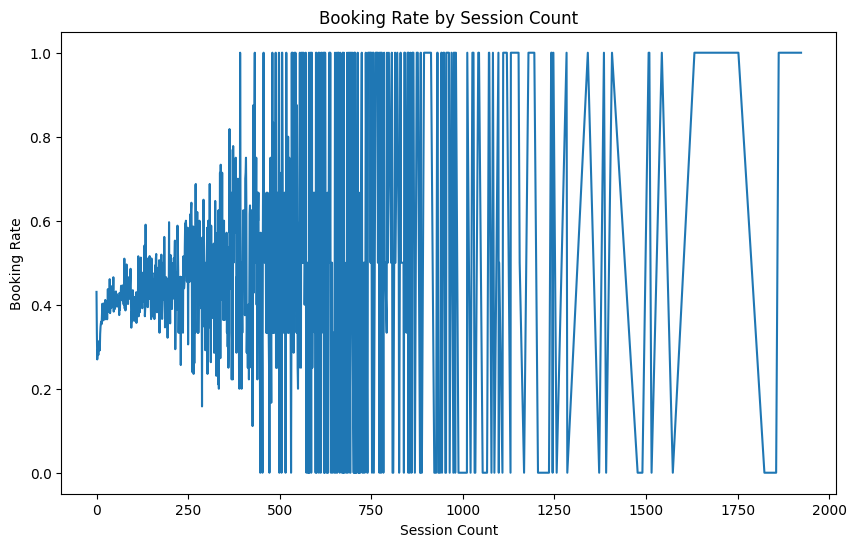

       session_count  booking_rate
count     870.000000    870.000000
mean      478.633333      0.493062
std       335.819993      0.291641
min         0.000000      0.000000
25%       217.250000      0.348370
50%       434.500000      0.454545
75%       669.750000      0.623922
max      1923.000000      1.000000
    session_count  booking_rate
0             0.0      0.430540
1             1.0      0.331530
2             2.0      0.269818
3             3.0      0.284180
4             4.0      0.293928
5             5.0      0.280341
6             6.0      0.296143
7             7.0      0.292683
8             8.0      0.314202
9             9.0      0.291438
10           10.0      0.330494
11           11.0      0.347073
12           12.0      0.356153
13           13.0      0.359756
14           14.0      0.353804
15           15.0      0.375839
16           16.0      0.402299
17           17.0      0.379747
18           18.0      0.391398
19           19.0      0.362903


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define file paths
sessions_path = '/content/drive/MyDrive/DataA_dev/Airbnb_new_user_booking/sessions.csv'
train_users_2_path = '/content/drive/MyDrive/DataA_dev/Airbnb_new_user_booking/train_users_2.csv'

# Load datasets into pandas dataframes
sessions_df = pd.read_csv(sessions_path)
train_users_2_df = pd.read_csv(train_users_2_path)

# 결측값 처리
train_users_2_df.fillna({'age': train_users_2_df['age'].median()}, inplace=True)
train_users_2_df.fillna('unknown', inplace=True)

# 데이터 타입 변환
train_users_2_df['date_account_created'] = pd.to_datetime(train_users_2_df['date_account_created'])
train_users_2_df['timestamp_first_active'] = pd.to_datetime(train_users_2_df['timestamp_first_active'], format='%Y%m%d%H%M%S')

# 필요 없는 열 제거
train_users_2_df = train_users_2_df.drop(['date_first_booking'], axis=1)

# 중복 데이터 확인 및 제거
sessions_df_unique = sessions_df.drop_duplicates(subset=['user_id', 'action', 'action_type', 'action_detail', 'device_type', 'secs_elapsed'])

# 사용자별 세션 수와 총 세션 시간 집계
sessions_agg = sessions_df_unique.groupby('user_id').agg({
    'action': 'count',
    'secs_elapsed': 'sum'
}).reset_index().rename(columns={'action': 'session_count', 'secs_elapsed': 'total_secs_elapsed'})


# 사용자 데이터와 세션 데이터 병합
train_users_2_df = train_users_2_df.rename(columns={'id': 'user_id'})
train_users_merged = pd.merge(train_users_2_df, sessions_agg, how='left', on='user_id')
train_users_merged['session_count'].fillna(0, inplace=True)
train_users_merged['total_secs_elapsed'].fillna(0, inplace=True)

# 예약 여부 추가
train_users_merged['booked'] = train_users_merged['country_destination'] != 'NDF'

# 세션 수에 따른 예약률 계산
session_booking_rate = train_users_merged.groupby('session_count')['booked'].mean().reset_index()
session_booking_rate.columns = ['session_count', 'booking_rate']

# 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(data=session_booking_rate, x='session_count', y='booking_rate')
plt.title('Booking Rate by Session Count')
plt.xlabel('Session Count')
plt.ylabel('Booking Rate')
plt.show()

# 세션 수에 따른 예약률 통계
print(session_booking_rate.describe())
print(session_booking_rate.head(20))  # 상위 20개 세션 수에 대한 예약률


#해석

**처음 세션 수가 적을 때 예약률 감소**:

사용자가 처음 몇 번의 세션에서 예약을 완료하지 못하면, 이후 세션에서도 예약을 완료하지 못할 가능성이 높음

**세션 수가 증가하면서 예약률 상승**:

그러나 일정 세션 수 이상이 되면, 사용자가 충분한 정보를 얻고 결정을 내리면서 예약률이 다시 상승하는 경향
이는 사용자가 더 많은 세션을 통해 더 많은 정보를 수집하고, 최종적으로 예약 결정을 내리는 것을 의미

**극단적인 세션 수의 경우**:

세션 수가 매우 많은 경우 예약률이 100%인 경우도 있지만, 이는 매우 드문 경우이며 전체적인 패턴을 해석하는 데 크게 영향을 미치지 않을 수 있음

가설 2 : 총 세션 시간이 길수록 예약률이 낮아진다.

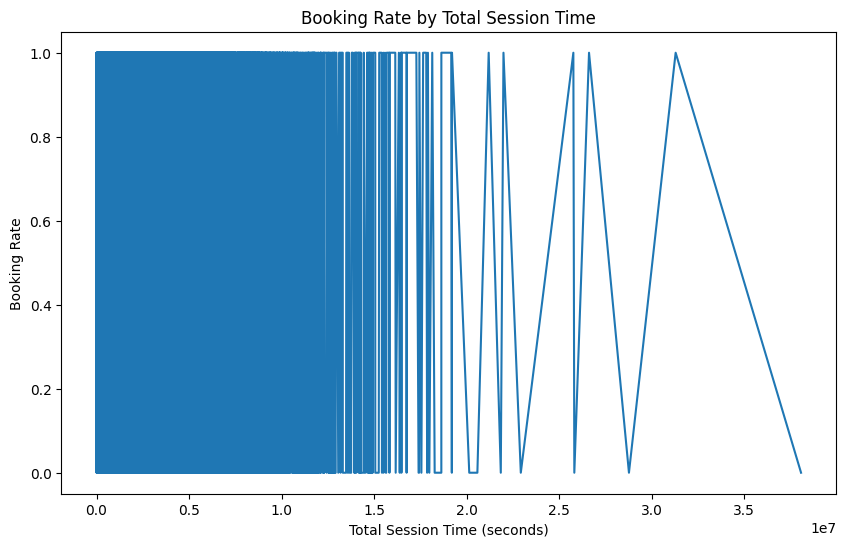

       total_secs_elapsed  booking_rate
count        7.017800e+04  70178.000000
mean         1.584276e+06      0.394610
std          1.931936e+06      0.486073
min          0.000000e+00      0.000000
25%          3.139315e+05      0.000000
50%          9.483430e+05      0.000000
75%          2.126658e+06      1.000000
max          3.808262e+07      1.000000
    total_secs_elapsed  booking_rate
0                  0.0      0.429698
1                  1.0      0.000000
2                  2.0      0.000000
3                  3.0      0.000000
4                  9.0      0.000000
5                 41.0      0.000000
6                 46.0      0.000000
7                 72.0      0.000000
8                 86.0      1.000000
9                 89.0      0.000000
10                94.0      0.000000
11               101.0      1.000000
12               104.0      0.000000
13               107.0      1.000000
14               109.0      0.000000
15               110.0      0.500000
16         

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define file paths
sessions_path = '/content/drive/MyDrive/DataA_dev/Airbnb_new_user_booking/sessions.csv'
train_users_2_path = '/content/drive/MyDrive/DataA_dev/Airbnb_new_user_booking/train_users_2.csv'

# Load datasets into pandas dataframes
sessions_df = pd.read_csv(sessions_path)
train_users_2_df = pd.read_csv(train_users_2_path)

# 결측값 처리
train_users_2_df.fillna({'age': train_users_2_df['age'].median()}, inplace=True)
train_users_2_df.fillna('unknown', inplace=True)

# 데이터 타입 변환
train_users_2_df['date_account_created'] = pd.to_datetime(train_users_2_df['date_account_created'])
train_users_2_df['timestamp_first_active'] = pd.to_datetime(train_users_2_df['timestamp_first_active'], format='%Y%m%d%H%M%S')

# 중복 데이터 확인 및 제거
sessions_df_unique = sessions_df.drop_duplicates(subset=['user_id', 'action', 'action_type', 'action_detail', 'device_type', 'secs_elapsed'])

# 사용자별 세션 수와 총 세션 시간 집계
sessions_agg = sessions_df_unique.groupby('user_id').agg({
    'action': 'count',
    'secs_elapsed': 'sum'
}).reset_index().rename(columns={'action': 'session_count', 'secs_elapsed': 'total_secs_elapsed'})

# 사용자 데이터와 세션 데이터 병합
train_users_2_df = train_users_2_df.rename(columns={'id': 'user_id'})
train_users_merged = pd.merge(train_users_2_df, sessions_agg, how='left', on='user_id')
train_users_merged['session_count'].fillna(0, inplace=True)
train_users_merged['total_secs_elapsed'].fillna(0, inplace=True)

# 예약 여부 추가
train_users_merged['booked'] = train_users_merged['country_destination'] != 'NDF'

# 총 세션 시간에 따른 예약률 계산
session_time_booking_rate = train_users_merged.groupby('total_secs_elapsed')['booked'].mean().reset_index()
session_time_booking_rate.columns = ['total_secs_elapsed', 'booking_rate']

# 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(data=session_time_booking_rate, x='total_secs_elapsed', y='booking_rate')
plt.title('Booking Rate by Total Session Time')
plt.xlabel('Total Session Time (seconds)')
plt.ylabel('Booking Rate')
plt.show()

# 총 세션 시간에 따른 예약률 통계
print(session_time_booking_rate.describe())
print(session_time_booking_rate.head(20))  # 상위 20개 총 세션 시간에 대한 예약률




#문제점

사용자 데이터의 id와 세션 데이터의 id가 일치하지 않을 수 있다.

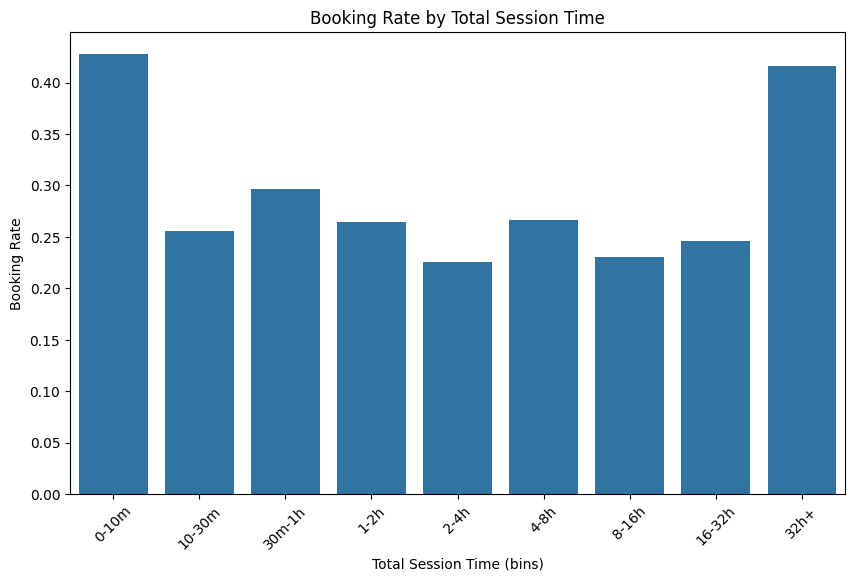

       booking_rate
count      9.000000
mean       0.292160
std        0.076629
min        0.225758
25%        0.245787
50%        0.264336
75%        0.296392
max        0.427875
  session_time_bin  booking_rate
0            0-10m      0.427875
1           10-30m      0.255487
2           30m-1h      0.296392
3             1-2h      0.264336
4             2-4h      0.225758
5             4-8h      0.266771
6            8-16h      0.230652
7           16-32h      0.245787
8             32h+      0.416386


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define file paths
sessions_path = '/content/drive/MyDrive/DataA_dev/Airbnb_new_user_booking/sessions.csv'
train_users_2_path = '/content/drive/MyDrive/DataA_dev/Airbnb_new_user_booking/train_users_2.csv'

# Load datasets into pandas dataframes
sessions_df = pd.read_csv(sessions_path)
train_users_2_df = pd.read_csv(train_users_2_path)

# 결측값 처리
train_users_2_df.fillna({'age': train_users_2_df['age'].median()}, inplace=True)
train_users_2_df.fillna('unknown', inplace=True)

# 데이터 타입 변환
train_users_2_df['date_account_created'] = pd.to_datetime(train_users_2_df['date_account_created'])
train_users_2_df['timestamp_first_active'] = pd.to_datetime(train_users_2_df['timestamp_first_active'], format='%Y%m%d%H%M%S')

# 중복 데이터 확인 및 제거
sessions_df_unique = sessions_df.drop_duplicates(subset=['user_id', 'action', 'action_type', 'action_detail', 'device_type', 'secs_elapsed'])

# 사용자별 세션 수와 총 세션 시간 집계
sessions_agg = sessions_df_unique.groupby('user_id').agg({
    'action': 'count',
    'secs_elapsed': 'sum'
}).reset_index().rename(columns={'action': 'session_count', 'secs_elapsed': 'total_secs_elapsed'})

# 사용자 데이터와 세션 데이터 병합
train_users_2_df = train_users_2_df.rename(columns={'id': 'user_id'})
train_users_merged = pd.merge(train_users_2_df, sessions_agg, how='left', on='user_id')
train_users_merged['session_count'].fillna(0, inplace=True)
train_users_merged['total_secs_elapsed'].fillna(0, inplace=True)

# 예약 여부 추가
train_users_merged['booked'] = train_users_merged['country_destination'] != 'NDF'

# 세션 시간 구간 생성
bins = [0, 600, 1800, 3600, 7200, 14400, 28800, 57600, 115200, float('inf')]
labels = ['0-10m', '10-30m', '30m-1h', '1-2h', '2-4h', '4-8h', '8-16h', '16-32h', '32h+']
train_users_merged['session_time_bin'] = pd.cut(train_users_merged['total_secs_elapsed'], bins=bins, labels=labels, right=False)

# 세션 시간 구간에 따른 예약률 계산
session_time_booking_rate = train_users_merged.groupby('session_time_bin')['booked'].mean().reset_index()
session_time_booking_rate.columns = ['session_time_bin', 'booking_rate']

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=session_time_booking_rate, x='session_time_bin', y='booking_rate')
plt.title('Booking Rate by Total Session Time')
plt.xlabel('Total Session Time (bins)')
plt.ylabel('Booking Rate')
plt.xticks(rotation=45)
plt.show()

# 세션 시간 구간에 따른 예약률 통계
print(session_time_booking_rate.describe())
print(session_time_booking_rate.head(20))  # 상위 20개 총 세션 시간에 대한 예약률


In [7]:
import pandas as pd

# 사용자 데이터 불러오기
train_users_2_path = '/content/drive/MyDrive/DataA_dev/Airbnb_new_user_booking/train_users_2.csv'
train_users_2_df = pd.read_csv(train_users_2_path)

# 세션 데이터 설명 대체
# 세션 데이터는 user_id, action, action_type, action_detail, device_type, secs_elapsed 컬럼으로 구성
# user_id의 값들이 train user와 일치하는지 확인되지 않음

# 결측값 처리
train_users_2_df.fillna({'age': train_users_2_df['age'].median()}, inplace=True)
train_users_2_df.fillna('unknown', inplace=True)

# 데이터 타입 변환
train_users_2_df['date_account_created'] = pd.to_datetime(train_users_2_df['date_account_created'])
train_users_2_df['timestamp_first_active'] = pd.to_datetime(train_users_2_df['timestamp_first_active'], format='%Y%m%d%H%M%S')

# 사용자 데이터의 샘플링
sample_users = train_users_2_df.sample(n=100)




In [8]:
# 샘플링된 사용자 ID 출력
print("샘플링된 사용자 ID:")
print(sample_users['id'])


샘플링된 사용자 ID:
136901    sa3dwnapgg
6705      tidfpgyb9q
8315      9wrh4c630d
160204    2vemneygcm
139748    hqlamzrajs
             ...    
57738     auyc63pf1d
164366    uweea2uyac
182427    127dv0hpqt
105784    v14dbnjn11
102393    ex1o9msj1w
Name: id, Length: 100, dtype: object


In [9]:
matched_sessions = sessions_df[sessions_df['user_id'].isin(sample_users['id'])]

In [10]:
 print("일치하는 세션 데이터 샘플:")
 print(matched_sessions.head())

일치하는 세션 데이터 샘플:
          user_id                action action_type       action_detail  \
21325  dj9aapa5ao        header_userpic        data      header_userpic   
21326  dj9aapa5ao  hosting_social_proof   -unknown-           -unknown-   
21327  dj9aapa5ao  hosting_social_proof   -unknown-           -unknown-   
21328  dj9aapa5ao         confirm_email       click  confirm_email_link   
21329  dj9aapa5ao                create      submit         create_user   

           device_type  secs_elapsed  
21325  Windows Desktop        3546.0  
21326  Windows Desktop       57270.0  
21327  Windows Desktop       22961.0  
21328    Android Phone      489597.0  
21329  Windows Desktop           NaN  


In [14]:
user_booking_rate = train_users_2_df.groupby('country_destination').size() / len(train_users_2_df)
print("국가별 예약률:")
print(user_booking_rate)

국가별 예약률:
country_destination
AU       0.002525
CA       0.006690
DE       0.004971
ES       0.010536
FR       0.023532
GB       0.010888
IT       0.013282
NDF      0.583473
NL       0.003570
PT       0.001017
US       0.292226
other    0.047290
dtype: float64


샘플 100개가 아닌 세션 데이터의 유니크 id만큼으로 해보기

<ipython-input-15-97646e7cc263>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_users_df.fillna({'age': filtered_users_df['age'].median()}, inplace=True)
<ipython-input-15-97646e7cc263>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_users_df.fillna('unknown', inplace=True)
<ipython-input-15-97646e7cc263>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fil

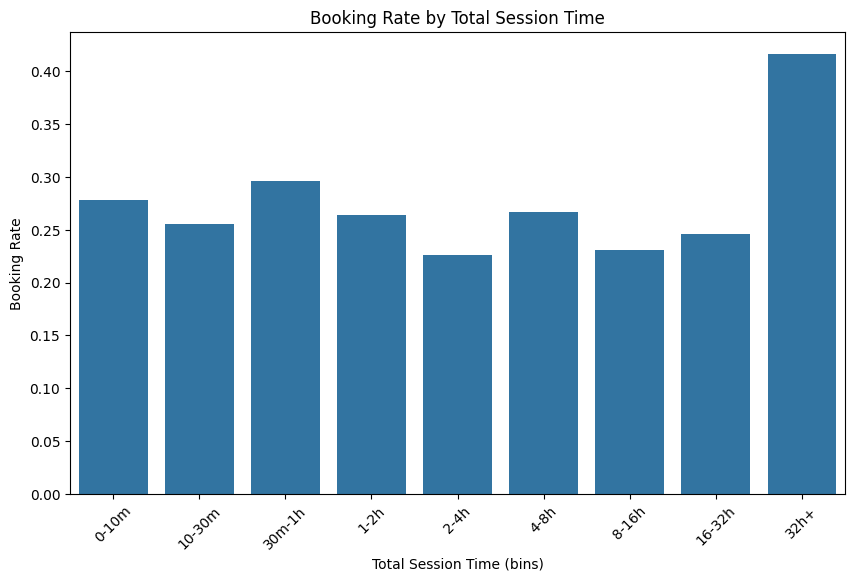

       booking_rate
count      9.000000
mean       0.275504
std        0.057295
min        0.225758
25%        0.245787
50%        0.264336
75%        0.277971
max        0.416386
  session_time_bin  booking_rate
0            0-10m      0.277971
1           10-30m      0.255487
2           30m-1h      0.296392
3             1-2h      0.264336
4             2-4h      0.225758
5             4-8h      0.266771
6            8-16h      0.230652
7           16-32h      0.245787
8             32h+      0.416386


In [15]:
import pandas as pd

# 사용자 데이터 불러오기
train_users_2_path = '/content/drive/MyDrive/DataA_dev/Airbnb_new_user_booking/train_users_2.csv'
train_users_2_df = pd.read_csv(train_users_2_path)



# 세션 데이터 불러오기
sessions_path = '/content/drive/MyDrive/DataA_dev/Airbnb_new_user_booking/sessions.csv'
sessions_df = pd.read_csv(sessions_path)

# 세션 데이터의 유니크 사용자 ID 추출
unique_session_user_ids = sessions_df['user_id'].unique()

# 유니크 사용자 ID를 기반으로 사용자 데이터 필터링
filtered_users_df = train_users_2_df[train_users_2_df['id'].isin(unique_session_user_ids)]

# 결측값 처리
filtered_users_df.fillna({'age': filtered_users_df['age'].median()}, inplace=True)
filtered_users_df.fillna('unknown', inplace=True)

# 데이터 타입 변환
filtered_users_df['date_account_created'] = pd.to_datetime(filtered_users_df['date_account_created'])
filtered_users_df['timestamp_first_active'] = pd.to_datetime(filtered_users_df['timestamp_first_active'], format='%Y%m%d%H%M%S')

# 세션 데이터 중복 제거
sessions_df_unique = sessions_df.drop_duplicates(subset=['user_id', 'action', 'action_type', 'action_detail', 'device_type', 'secs_elapsed'])

# 사용자별 세션 수와 총 세션 시간 집계
sessions_agg = sessions_df_unique.groupby('user_id').agg({
    'action': 'count',
    'secs_elapsed': 'sum'
}).reset_index().rename(columns={'action': 'session_count', 'secs_elapsed': 'total_secs_elapsed'})

# 사용자 데이터와 세션 데이터 병합
filtered_users_df = filtered_users_df.rename(columns={'id': 'user_id'})
train_users_merged = pd.merge(filtered_users_df, sessions_agg, how='left', on='user_id')
train_users_merged['session_count'].fillna(0, inplace=True)
train_users_merged['total_secs_elapsed'].fillna(0, inplace=True)

# 예약 여부 추가
train_users_merged['booked'] = train_users_merged['country_destination'] != 'NDF'

# 세션 시간 구간 생성
bins = [0, 600, 1800, 3600, 7200, 14400, 28800, 57600, 115200, float('inf')]
labels = ['0-10m', '10-30m', '30m-1h', '1-2h', '2-4h', '4-8h', '8-16h', '16-32h', '32h+']
train_users_merged['session_time_bin'] = pd.cut(train_users_merged['total_secs_elapsed'], bins=bins, labels=labels, right=False)

# 세션 시간 구간에 따른 예약률 계산
session_time_booking_rate = train_users_merged.groupby('session_time_bin')['booked'].mean().reset_index()
session_time_booking_rate.columns = ['session_time_bin', 'booking_rate']

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=session_time_booking_rate, x='session_time_bin', y='booking_rate')
plt.title('Booking Rate by Total Session Time')
plt.xlabel('Total Session Time (bins)')
plt.ylabel('Booking Rate')
plt.xticks(rotation=45)
plt.show()

# 세션 시간 구간에 따른 예약률 통계
print(session_time_booking_rate.describe())
print(session_time_booking_rate)


32시간+총합의 세션 시간의 사용자의 예약률이 높다는 이상한 점 발견

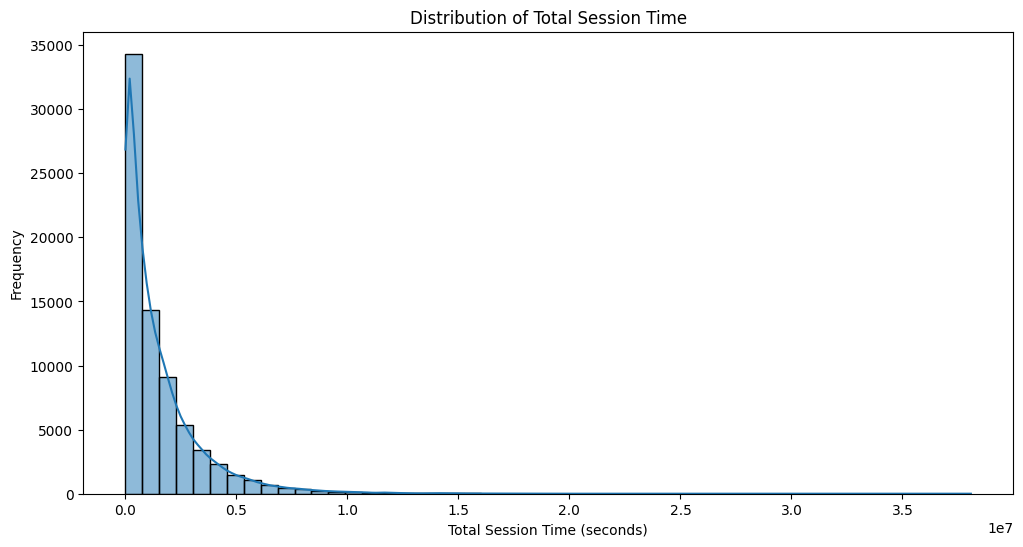

In [16]:
# 세션 시간의 분포 확인
plt.figure(figsize=(12, 6))
sns.histplot(train_users_merged['total_secs_elapsed'], bins=50, kde=True)
plt.title('Distribution of Total Session Time')
plt.xlabel('Total Session Time (seconds)')
plt.ylabel('Frequency')
plt.show()


  session_time_bin  booking_rate  user_count
0            0-10m      0.277971        2583
1           10-30m      0.255487        1139
2           30m-1h      0.296392         776
3             1-2h      0.264336         715
4             2-4h      0.225758         660
5             4-8h      0.266771        1282
6            8-16h      0.230652        1964
7           16-32h      0.245787        3145
8             32h+      0.416386       61551


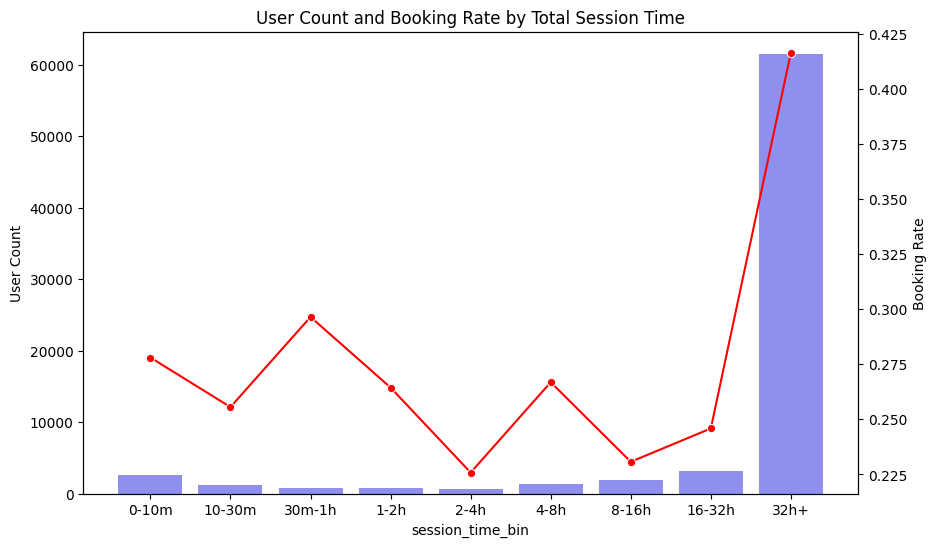

In [17]:
# 세션 시간 구간별 사용자 수 계산
session_time_counts = train_users_merged['session_time_bin'].value_counts().reset_index()
session_time_counts.columns = ['session_time_bin', 'user_count']

# 세션 시간 구간별 예약률과 사용자 수를 함께 출력
session_time_booking_rate_counts = pd.merge(session_time_booking_rate, session_time_counts, on='session_time_bin')
print(session_time_booking_rate_counts)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=session_time_booking_rate_counts, x='session_time_bin', y='user_count', color='blue', alpha=0.5)
plt.ylabel('User Count')
plt.twinx()
sns.lineplot(data=session_time_booking_rate_counts, x='session_time_bin', y='booking_rate', color='red', marker='o')
plt.ylabel('Booking Rate')
plt.title('User Count and Booking Rate by Total Session Time')
plt.xlabel('Total Session Time (bins)')
plt.xticks(rotation=45)
plt.show()


In [18]:
long_session_users = train_users_merged[train_users_merged['session_time_bin'] == '32h+']
print("32시간 이상 사용자 특성 분석:")
print(long_session_users.describe())

32시간 이상 사용자 특성 분석:
                date_account_created         timestamp_first_active  \
count                          61551                          61551   
mean   2014-04-11 05:45:48.296534784  2014-04-11 18:16:53.698883840   
min              2014-01-01 00:00:00            2014-01-01 00:09:36   
25%              2014-02-27 00:00:00     2014-02-27 05:08:17.500000   
50%              2014-04-17 00:00:00            2014-04-17 21:03:05   
75%              2014-05-26 00:00:00     2014-05-26 18:17:29.500000   
max              2014-06-30 00:00:00            2014-06-30 23:58:24   
std                              NaN                            NaN   

                age   signup_flow  session_count  total_secs_elapsed  
count  61551.000000  61551.000000   61551.000000        6.155100e+04  
mean      38.422918      4.597098      85.446946        1.809031e+06  
min        1.000000      0.000000       0.000000        1.152110e+05  
25%       31.000000      0.000000      23.000000        5

**계정 생성일(date_account_created)**:
32시간 이상 세션 시간을 가진 사용자들은 대부분 2014년 초반(1월~5월) 사이에 계정을 생성

**첫 활동 시간(timestamp_first_active)**:
이들 사용자의 첫 활동 시간 역시 2014년 초반으로, 계정 생성 후 바로 활동을 시작한 사용자들이 많음을 알 수 있음.

**연령(age)**:
평균 연령이 약 38세로, 25% 이상의 사용자가 29세 이하임을 알 수 있습니다. 이는 비교적 젊은 층이 많음

**가입 흐름(signup_flow)** :
가입 흐름 값이 고르게 분포되어 있으며, 특정 가입 경로를 통해 가입한 사용자가 많음

**세션 수(session_count)**:
평균 세션 수가 약 85회로, 매우 많은 세션을 수행한 사용자들이며, 이는 이들이 플랫폼에서 매우 활동적이다.

**총 세션 시간(total_secs_elapsed)**:
총 세션 시간의 평균값이 약 1.55e+07 초로, 매우 긴 시간 동안 활동한다.

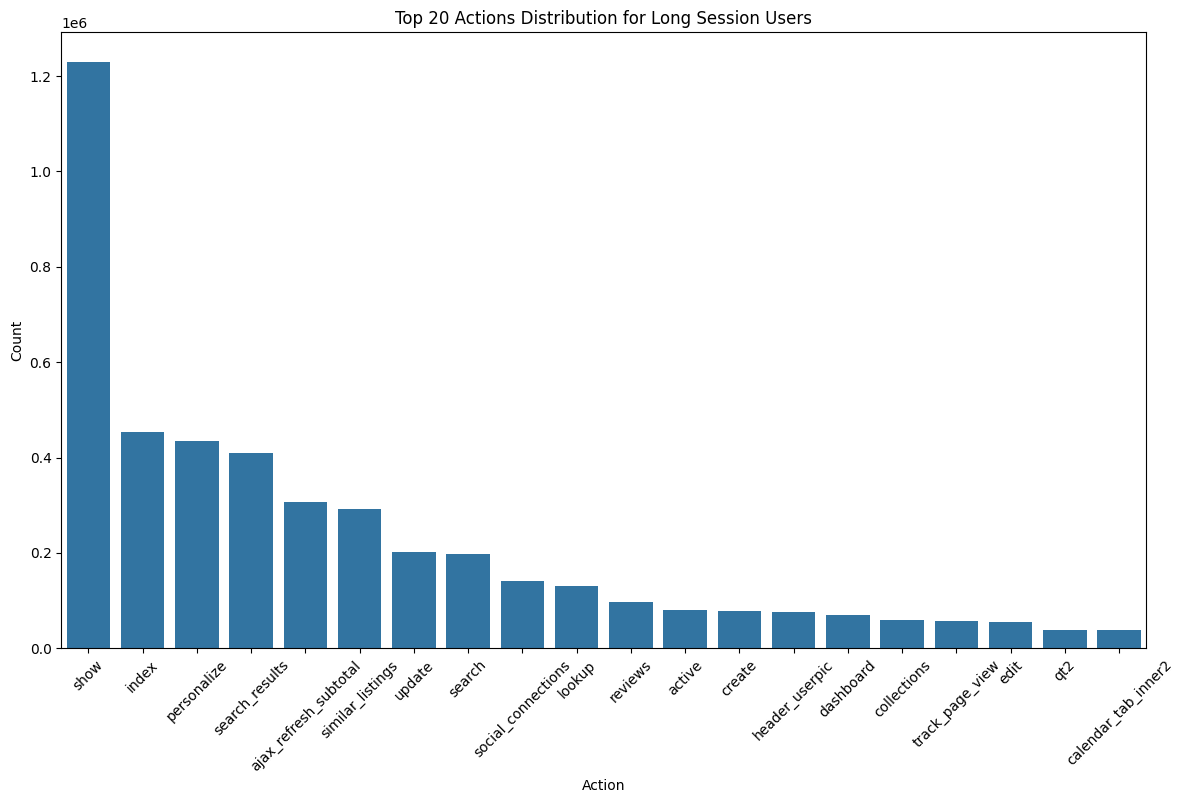

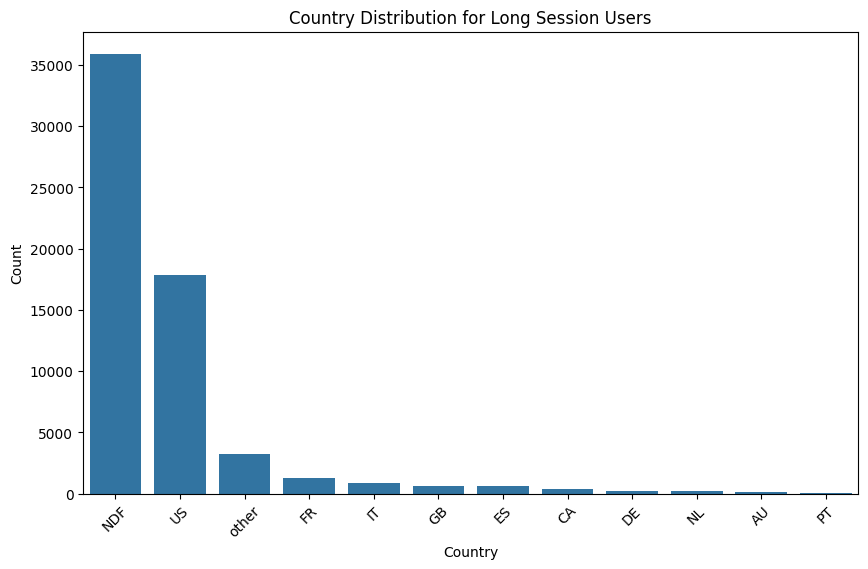

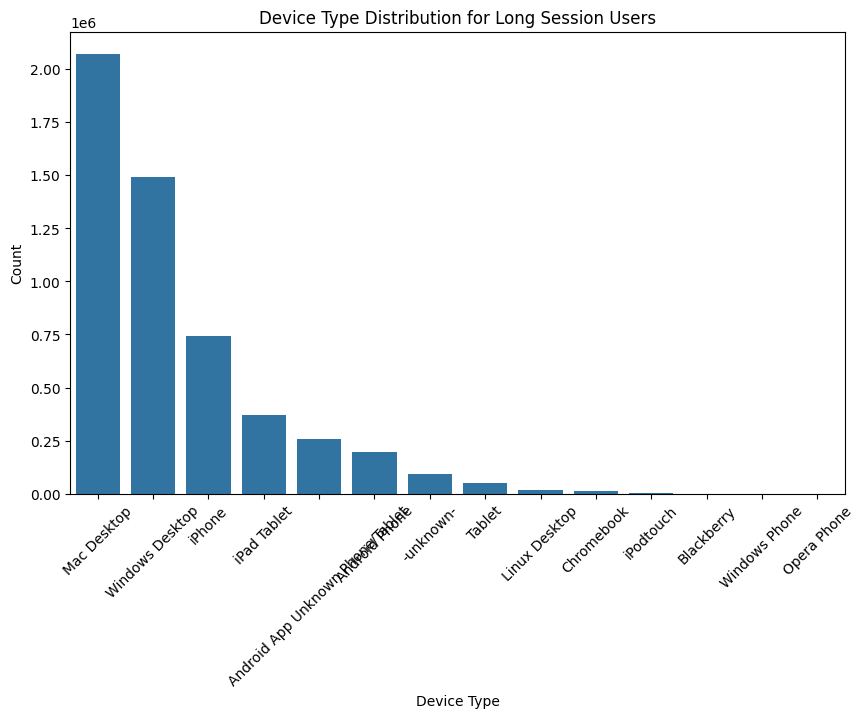

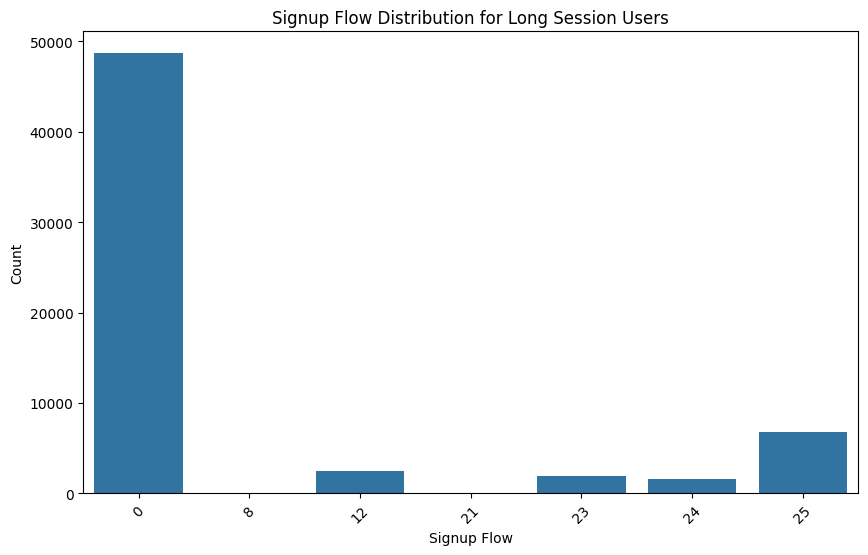

In [21]:
# 행동 분석
long_session_behavior = sessions_df_unique[sessions_df_unique['user_id'].isin(long_session_users['user_id'])]
action_distribution = long_session_behavior['action'].value_counts().reset_index()
action_distribution.columns = ['action', 'count']

# 상위 20개의 행동만 시각화
top_actions = action_distribution.head(20)

# 시각화
plt.figure(figsize=(14, 8))
sns.barplot(data=top_actions, x='action', y='count')
plt.title('Top 20 Actions Distribution for Long Session Users')
plt.xlabel('Action')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 국가별 분석
country_distribution = long_session_users['country_destination'].value_counts().reset_index()
country_distribution.columns = ['country_destination', 'count']

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=country_distribution, x='country_destination', y='count')
plt.title('Country Distribution for Long Session Users')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 디바이스 분석
device_distribution = long_session_behavior['device_type'].value_counts().reset_index()
device_distribution.columns = ['device_type', 'count']

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=device_distribution, x='device_type', y='count')
plt.title('Device Type Distribution for Long Session Users')
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 가입 경로 분석
signup_flow_distribution = long_session_users['signup_flow'].value_counts().reset_index()
signup_flow_distribution.columns = ['signup_flow', 'count']

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=signup_flow_distribution, x='signup_flow', y='count')
plt.title('Signup Flow Distribution for Long Session Users')
plt.xlabel('Signup Flow')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#train,test데이터 분석


In [32]:
import pandas as pd
train_users=pd.read_csv("/content/drive/MyDrive/DataA_dev/Airbnb_new_user_booking/train_users_2.csv")
test_users=pd.read_csv("/content/drive/MyDrive/DataA_dev/Airbnb_new_user_booking/test_users.csv")

데이터 체크

In [23]:
# Check for missing values in the datasets
train_users.info(), test_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

(None, None)

데이터 전처리

In [24]:



train_users['age'].fillna(train_users['age'].median(), inplace=True)
train_users['first_affiliate_tracked'].fillna('untracked', inplace=True)


train_users['date_account_created'] = pd.to_datetime(train_users['date_account_created'])
train_users['timestamp_first_active'] = pd.to_datetime(train_users['timestamp_first_active'], format='%Y%m%d%H%M%S')


train_users['date_first_booking'] = pd.to_datetime(train_users['date_first_booking'], errors='coerce')


train_users['booking_made'] = ~train_users['date_first_booking'].isna()


train_users.info(), train_users.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       213451 non-null  object        
 1   date_account_created     213451 non-null  datetime64[ns]
 2   timestamp_first_active   213451 non-null  datetime64[ns]
 3   date_first_booking       88908 non-null   datetime64[ns]
 4   gender                   213451 non-null  object        
 5   age                      213451 non-null  float64       
 6   signup_method            213451 non-null  object        
 7   signup_flow              213451 non-null  int64         
 8   language                 213451 non-null  object        
 9   affiliate_channel        213451 non-null  object        
 10  affiliate_provider       213451 non-null  object        
 11  first_affiliate_tracked  213451 non-null  object        
 12  signup_app      

(None,
            id date_account_created timestamp_first_active date_first_booking  \
 0  gxn3p5htnn           2010-06-28    2009-03-19 04:32:55                NaT   
 1  820tgsjxq7           2011-05-25    2009-05-23 17:48:09                NaT   
 2  4ft3gnwmtx           2010-09-28    2009-06-09 23:12:47         2010-08-02   
 3  bjjt8pjhuk           2011-12-05    2009-10-31 06:01:29         2012-09-08   
 4  87mebub9p4           2010-09-14    2009-12-08 06:11:05         2010-02-18   
 
       gender   age signup_method  signup_flow language affiliate_channel  \
 0  -unknown-  34.0      facebook            0       en            direct   
 1       MALE  38.0      facebook            0       en               seo   
 2     FEMALE  56.0         basic            3       en            direct   
 3     FEMALE  42.0      facebook            0       en            direct   
 4  -unknown-  41.0         basic            0       en            direct   
 
   affiliate_provider first_affiliate_tra

회원 가입 후 첫 예약 까지 걸리는 일 수

In [25]:

train_users['time_to_first_booking'] = (train_users['date_first_booking'] - train_users['date_account_created']).dt.days


train_users.loc[train_users['time_to_first_booking'] < 0, 'time_to_first_booking'] = None


avg_time_to_first_booking = train_users['time_to_first_booking'].mean()

avg_time_to_first_booking


44.41913162839366

활동 유저 비율

In [26]:
average_booking_frequency = train_users[train_users['country_destination'] != 'NDF'].shape[0] / train_users.shape[0]

average_booking_frequency

0.4165265095970504

재방문율

In [28]:
train_users_2_df['date_account_created'] = pd.to_datetime(train_users_2_df['date_account_created'])
train_users_2_df['timestamp_first_active'] = pd.to_datetime(train_users_2_df['timestamp_first_active'], format='%Y%m%d%H%M%S')

# 예약을 한 사용자만 필터링
repeat_users = train_users_2_df[train_users_2_df['country_destination'] != 'NDF']

# 각 사용자가 예약한 날짜 정렬
repeat_users_sorted = repeat_users.sort_values(by=['id', 'date_account_created'])

# 사용자별 예약 날짜 그룹화
repeat_users_sorted['repeat_visit'] = repeat_users_sorted.groupby('id')['date_account_created'].diff().dt.days

# 재방문 사용자 수 계산
repeat_user_counts = repeat_users_sorted[repeat_users_sorted['repeat_visit'] > 0]['id'].nunique()

# 재방문율 계산
total_users = train_users_2_df['id'].nunique()
repeat_user_rate = repeat_user_counts / total_users

print("재방문율:", repeat_user_rate)

재방문율: 0.0


In [29]:
# 데이터 확인
print(train_users_2_df.head())
print(train_users_2_df.info())
print(train_users_2_df['id'].nunique())  # 고유 사용자 수 확인
print(train_users_2_df['country_destination'].value_counts())  # 각 목적지별 사용자 수 확인

           id date_account_created timestamp_first_active date_first_booking  \
0  gxn3p5htnn           2010-06-28    2009-03-19 04:32:55                NaN   
1  820tgsjxq7           2011-05-25    2009-05-23 17:48:09                NaN   
2  4ft3gnwmtx           2010-09-28    2009-06-09 23:12:47         2010-08-02   
3  bjjt8pjhuk           2011-12-05    2009-10-31 06:01:29         2012-09-08   
4  87mebub9p4           2010-09-14    2009-12-08 06:11:05         2010-02-18   

      gender   age signup_method  signup_flow language affiliate_channel  \
0  -unknown-   NaN      facebook            0       en            direct   
1       MALE  38.0      facebook            0       en               seo   
2     FEMALE  56.0         basic            3       en            direct   
3     FEMALE  42.0      facebook            0       en            direct   
4  -unknown-  41.0         basic            0       en            direct   

  affiliate_provider first_affiliate_tracked signup_app first_

In [30]:
# 예약을 한 사용자만 필터링
repeat_users = train_users_2_df[train_users_2_df['country_destination'] != 'NDF']

# 각 사용자가 예약한 날짜 정렬
repeat_users_sorted = repeat_users.sort_values(by=['id', 'date_account_created'])

# 사용자별 예약 날짜 그룹화
repeat_users_sorted['date_account_created'] = pd.to_datetime(repeat_users_sorted['date_account_created'])
repeat_users_sorted['repeat_visit'] = repeat_users_sorted.groupby('id')['date_account_created'].diff().dt.days

# 재방문 사용자 수 계산
repeat_user_counts = repeat_users_sorted[repeat_users_sorted['repeat_visit'] > 0]['id'].nunique()

# 재방문율 계산
total_users = train_users_2_df['id'].nunique()
repeat_user_rate = repeat_user_counts / total_users

print("재방문율:", repeat_user_rate)

재방문율: 0.0


연령별 분석

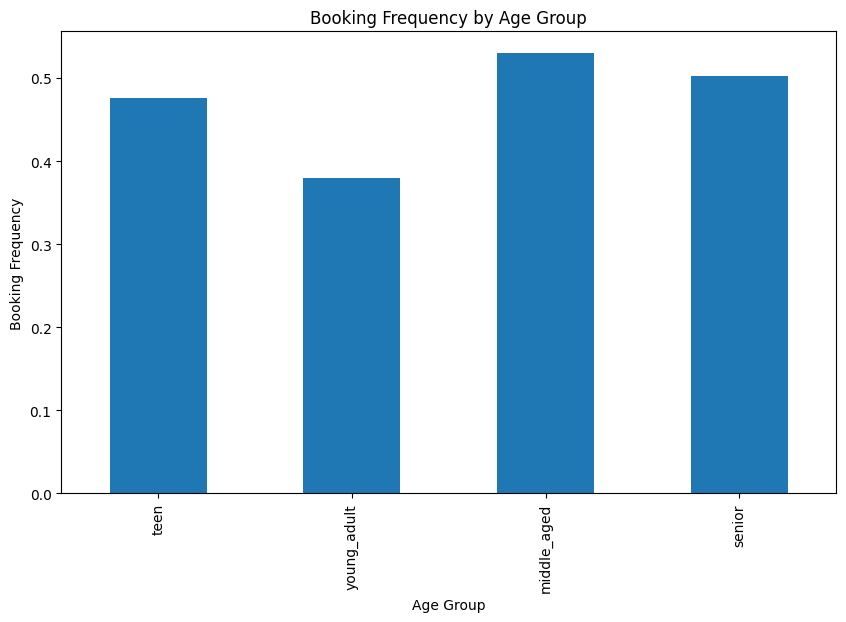

In [ ]:

bins = [0, 18, 35, 50, 100]
labels = ['teen', 'young_adult', 'middle_aged', 'senior']
train_users['age_group'] = pd.cut(train_users['age'], bins, labels=labels)


age_group_booking_frequency = train_users[train_users['country_destination'] != 'NDF'].groupby('age_group').size() / train_users.groupby('age_group').size()

import matplotlib.pyplot as plt

age_group_booking_frequency.plot(kind='bar', figsize=(10, 6))
plt.title('Booking Frequency by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Booking Frequency')
plt.show()


성별 분석

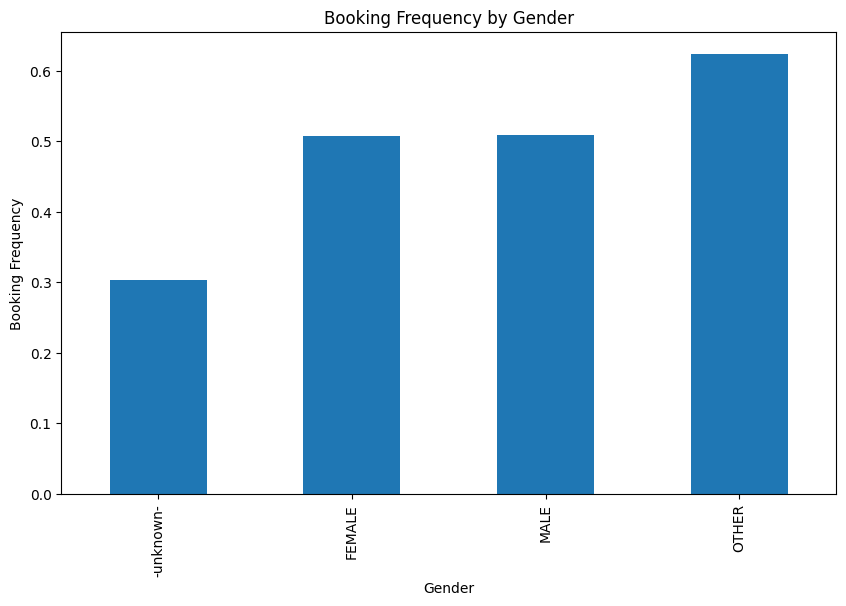

In [ ]:
gender_booking_frequency = train_users[train_users['country_destination'] != 'NDF'].groupby('gender').size() / train_users.groupby('gender').size()


gender_booking_frequency.plot(kind='bar', figsize=(10, 6))
plt.title('Booking Frequency by Gender')
plt.xlabel('Gender')
plt.ylabel('Booking Frequency')
plt.show()